### Rainfall data 
First part is repretition of the drought analysis but will be shown for completeness

In [2]:
%matplotlib inline 
import glob
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
from datetime import timedelta
import scipy.stats as stats
import os

# plotting
from shapely.geometry import Polygon
from shapely.geometry import Point
import geopandas as gpd
from geospatial_functions import get_background_map
import rasterio
from rasterio.plot import show as rioshow
import folium


path = os.getcwd()
home_path = os.path.dirname(os.path.dirname(path))
gis_folder = f'{home_path}\\QGIS project'

easily read all text data files  with:

In [3]:
rainfall = pd.DataFrame()
# Black_volta = -2.75E_9.50N
# Lake_Volta 0.0E_6.5N
# Mouhoun -4.00E_12.00N
# Nakambe -2.0E_13.5N
# Oti = 0.0E_8.5N
# Penjari = 1.0E_11.0N
# Ougadougou = -1.5E_12.4N

In [4]:
glob.glob(f'{home_path}\\data\\Volta_precip_latest\*csv')

['C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Black Volta_-2.75_9.55.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Lake Volta_0.05_6.45.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Mouhoun_-3.95_12.05.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Nakambe_-2.15_13.55.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Oti_0.15_8.45.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\

In [5]:
lst_dfs = []
for path in glob.glob(f'{home_path}\\data\\Volta_precip_latest\*csv'):
    print(path)
    df_input = pd.read_csv(path, parse_dates = [0], delimiter = ',', index_col=[0],skiprows=1,
                  skipinitialspace = True, header = None, usecols=[0,1], names = ['Date','precipitation'])
    
    lst_dfs.append(df_input)

C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_precip_latest\Black Volta_-2.75_9.55.csv
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_precip_latest\Lake Volta_0.05_6.45.csv
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_precip_latest\Mouhoun_-3.95_12.05.csv
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_precip_latest\Nakambe_-2.15_13.55.csv
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_precip_latest\Oti_0.15_8.45.csv
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_precip_latest\Pendjari_1.15_11.15.csv


In [6]:
names_col = ['Black_Volta', 'Lake_Volta','Mouhoun','Nakambe', 'Oti', 'Penjari'] 
Rainfall_data_new = pd.concat(lst_dfs, axis = 1,  keys = names_col,ignore_index=False)
Rainfall_data_new.columns = Rainfall_data_new.columns.droplevel(level=1)

<AxesSubplot: xlabel='Date'>

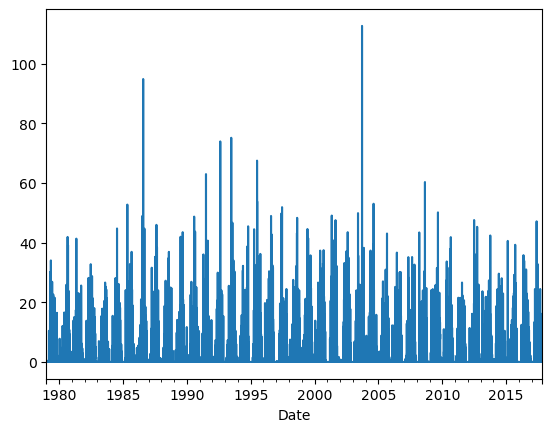

In [7]:
Rainfall_data_new['Black_Volta'].plot()

In [8]:
output = False
if output:
    Rainfall_data_new_msum = Rainfall_data_new.resample('M').sum()
    Rainfall_data_new_msum.to_excel(f"{home_path}\\data\\Combining data\\Monthly_sum_rainfall_new.xlsx")

# old data:

In [9]:
lst_dfs = []
for path in glob.glob(f'{home_path}\\data\\Volta_ERA5_lat_lon\*txt'):
    print(path)
    df_input = pd.read_csv(path, parse_dates = [0], delimiter = ' ', index_col=[0], skiprows=31, 
                  skipinitialspace = True, header = None, usecols=[0,1], names = ['Date','precipitation'])
    
    lst_dfs.append(df_input)

C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_ERA5_lat_lon\ichirps_20_25_-1.5E_12.4N_n.dat.txt
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_ERA5_lat_lon\ichirps_20_25_-2.0E_13.5N_n.dat.txt
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_ERA5_lat_lon\ichirps_20_25_-2.75E_9.50N_i.dat.txt
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_ERA5_lat_lon\ichirps_20_25_-4.00E_12.00N_n.dat.txt
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_ERA5_lat_lon\ichirps_20_25_0.0E_6.5N_n.dat.txt
C:\Users\david\Documents\@@ Python\Jaar 5\Q3\ENVM1400 Information and advice\Volta project\Volta-burkina-faso\data\Volta_ERA5_lat_lon\ichirps_20_25_0

In [10]:
names_col = ['Ouagadougou','Nakambe', 'Black_Volta', 'Mouhoun','Lake_Volta', 'Oti', 'Penjari'] 
Rainfall_data_old = pd.concat(lst_dfs, axis = 1,  keys = names_col,ignore_index=False)

In [11]:
Rainfall_data_old.columns = Rainfall_data_old.columns.droplevel(level=1)

Quite a difference 

<AxesSubplot: xlabel='Date'>

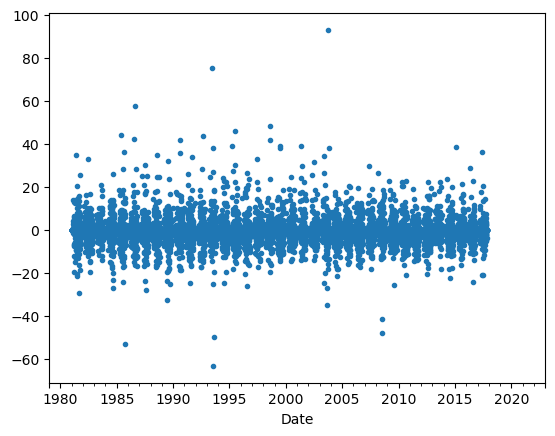

In [12]:
(Rainfall_data_new['Black_Volta'] - Rainfall_data_old['Black_Volta']).plot(lw=0,marker=".")

Look at new locations

In [13]:
for path in glob.glob(f'{home_path}\\data\\Volta_precip_latest\*csv'):
    print(path[-15:-4])

_-2.75_9.55
a_0.05_6.45
-3.95_12.05
-2.15_13.55
i_0.15_8.45
_1.15_11.15


In [14]:
loc= [[-2.75, 9.55],
     [0.05, 6.45],
     [-3.95, 12.05],
     [-2.15, 13.55],
     [0.15, 8.45],
     [1.15, 11.15]]
loc_data =[]
for p in loc:
    loc_data.append(Point(p))

In [15]:
names = ['Black_Volta', 'Lake_Volta','Mouhoun','Nakambe', 'Oti', 'Penjari'] 
geo_series_locations = gpd.GeoSeries(data=loc_data)

gdf_precip = gpd.GeoDataFrame(data=names, columns=["name"],geometry=geo_series_locations)

In [16]:
country_outline = gpd.read_file(f"{gis_folder}\\country_outline_32630.gpkg")
volta_outline = gpd.read_file(f"{gis_folder}\\volta_watershed_vector_32630.gpkg",crs="epsg:32630")
main_rivers = gpd.read_file(f"{gis_folder}\\main_rivers_volta.gpkg",crs="epsg:32630")

country_outline = country_outline.set_geometry(country_outline.geometry.to_crs('EPSG:4326'))
volta_outline = volta_outline.set_geometry(volta_outline.geometry.to_crs('EPSG:4326'))
main_rivers = main_rivers.set_geometry(main_rivers.geometry.to_crs('EPSG:4326'))

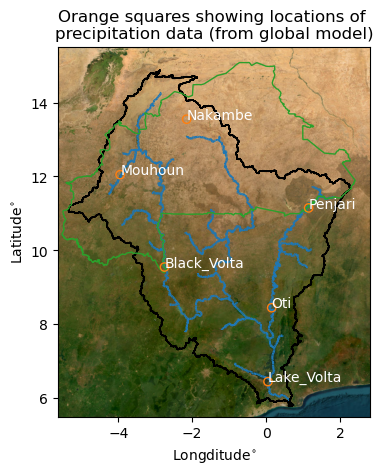

In [17]:
fig, ax = plt.subplots(1)
main_rivers.plot(ax=ax, color="C0",zorder=1)
# get the bounds for background
bounds_precip_measurements = (ax.get_xlim()[0], ax.get_ylim()[0], ax.get_xlim()[1], ax.get_ylim()[1])

country_outline.plot(ax=ax, facecolor="none", edgecolor="C2",zorder=6)
volta_outline.plot(ax=ax,edgecolor="k", facecolor='none')
gdf_precip.plot(ax=ax, facecolor="none",edgecolor="C1",zorder=10)

# add labels
mid_points = gdf_precip.geometry.centroid
for index, name in enumerate(gdf_precip.name):
    ax.annotate(name, (mid_points.iloc[index].x,mid_points.iloc[index].y),zorder=10, color="w")
# add background
with rasterio.open(get_background_map("precip_measurements", bounds_precip_measurements)) as r:
    rioshow(r, ax=ax)
    
# crop a little
ax.set_ylim((5.5,15.5))
ax.set_title("Orange squares showing locations of \nprecipitation data (from global model)")
ax.set_xlabel("Longditude$^{\circ}$");
ax.set_ylabel("Latitude$^{\circ}$");

In [18]:
output = False
if output:
    gdf_precip.to_file(f"{home_path}\\data\\Combining data\\precipitation_data_client_new.geojson")

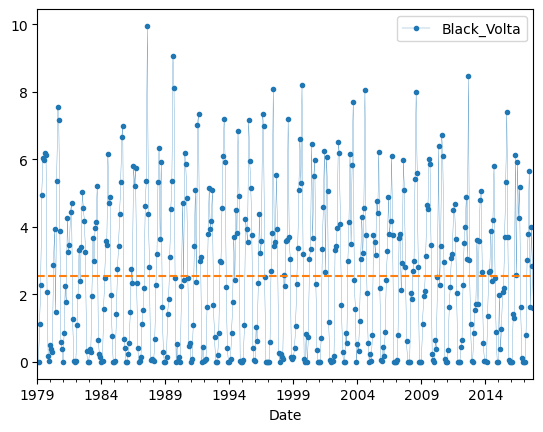

In [23]:
df_station_monthly_sum

,Black_Volta
Date,
1979-01-31,0.002258
1979-02-28,0.006786
1979-03-31,1.116452
1979-04-30,2.266333
1979-05-31,4.937419
...,...
2017-06-30,5.658000
2017-07-31,1.627742
2017-08-31,4.000000


In [54]:
station = "Black_Volta"
df_station = Rainfall_data_new[[station]]
df_station_monthly_sum = df_station.resample('m').sum()

lst_temps = []
months = []
for i in range(1,12+1):
    lst_temps.append(df_station_monthly_sum[df_station_monthly_sum.index.month==i].mean()[station])
    months.append(i)
df = pd.DataFrame(data=zip(months,lst_temps), columns=["months","Temperature"])

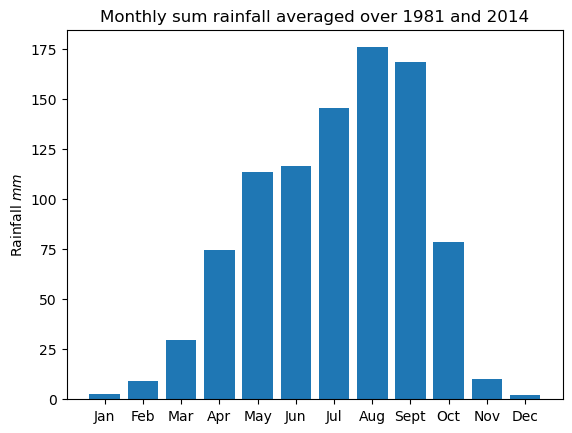

In [60]:
fig, ax = plt.subplots(1)

ax.bar(df.months,df.Temperature)#,marker=".",color="C3")
ax.set_title("Monthly sum rainfall averaged over 1981 and 2014")
ax.set_ylabel("Rainfall $mm$")
ax.set_xticks(df.months)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
fig.savefig('Monthly_average_precipitaion_1981_2014.png', transparent=False,bbox_inches='tight',pad_inches=0.1)

In [20]:
fig, ax = plt.subplots(1)
# df_station_yearly_sum.plot(ax=ax,lw=0.2,marker='.')
# ax.axhline(df_station_yearly_sum.mean()[station],label="mean",color="C1",ls="--")

Black_Volta    2.533249
dtype: float64